In [22]:
import matplotlib.pyplot as plt
import matplotlib
import random

In [45]:
matplotlib.style.use('tableau-colorblind10')

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [69]:
def calc_expected_result(r1, r2):
    return 1/(1+10**((r2-r1)/400))

def calc_new_rating(result, exp, r1, K):
    """Calculate new ELO rating of player with rating `r1` given that
    their expected result was `exp` and the actual result was `result` (1 for
    win, 0 for loss). `K` is the K-factor used to determine how much
    the rating changes by."""
    return r1 + K*(result - exp)

In [99]:
K = 8
samples = 10000
games_per_sample = 100
actual_rating = 1800
ratings_by_sample = []

for _ in range(samples):
    player_rating = actual_rating
    ratings_for_sample = []
    for i in range(games_per_sample):
        opponent_rating = player_rating
        P_win = calc_expected_result(actual_rating, opponent_rating)
        result = 1 if random.random() < P_win else 0
        #print(actual_rating, player_rating, opponent_rating, P_win, result)
        player_rating = calc_new_rating(result, P_win, player_rating, K)
        ratings_for_sample.append(player_rating)
    ratings_by_sample.append(ratings_for_sample)

Text(0, 0.5, 'ELO Rating')

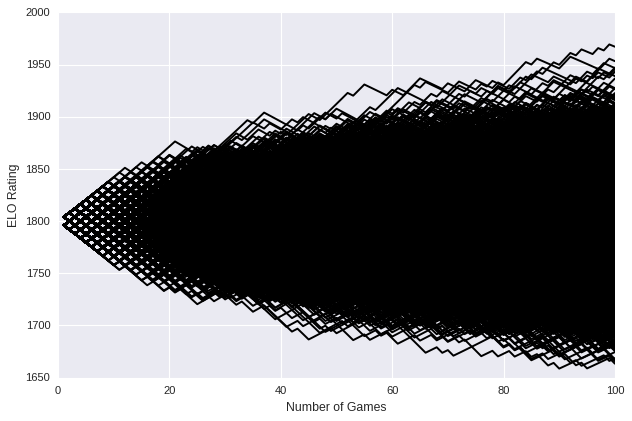

In [100]:
xs = list(range(1, games_per_sample+1))
for ys in ratings_by_sample:
    plt.plot(xs, ys, color="black")
plt.xlabel("Number of Games")
plt.ylabel("ELO Rating")

Text(0, 0.5, 'P(AnyRatingDifference >= RatingDifference)')

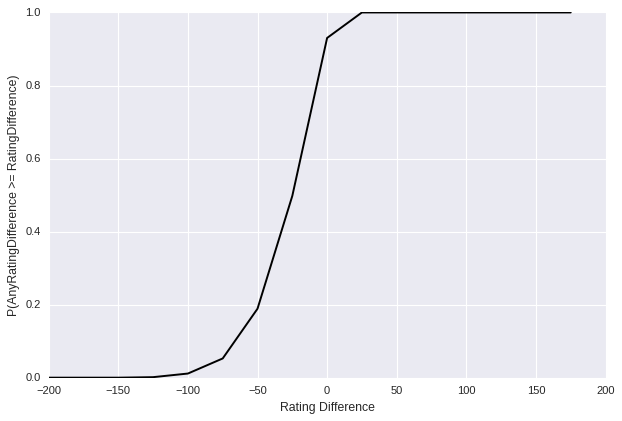

In [105]:
target_ratings = list(range(1600, 2000, 25))
xs = []
ys = []
for target_rating in target_ratings:
    x = target_rating - actual_rating
    xs.append(x)
    count = 0
    for ratings_for_sample in ratings_by_sample:
        if any(r-actual_rating <= x for r in ratings_for_sample):
            count += 1
    ys.append(count/len(ratings_by_sample))
plt.plot(xs, ys, color="black")
plt.xlabel("Rating Difference")
plt.ylabel("P(AnyRatingDifference >= RatingDifference)")

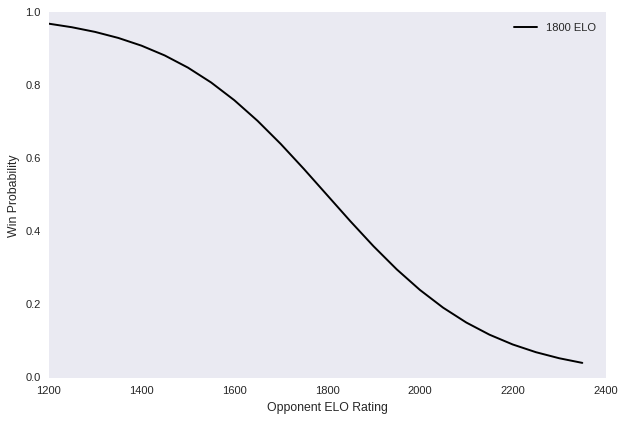

In [104]:
xs = list(range(1200, 2400, 50))
plt.plot(xs,
         [calc_expected_result(actual_rating, x) for x in xs],
         label="1800 ELO",
         color="black")
plt.xlabel("Opponent ELO Rating")
plt.ylabel("Win Probability")
plt.grid(linestyle="--")
plt.legend()